# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент группы 9304 Арутюнян Владимир, вариант 23.

## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Основные теоретические положения

Для возведения некоторого числа $x$ в натуральную степень $n$ за минимальное количество операций есть несколько методов, некоторые из которых приведены ниже.

### Бинарный метод возведения числа в степень:
Метод возведения в степень, в котором необходимо записать степень $n$ в двоичной системе счисления:
<center>$n_d = (a_m a_{m-1} a_{m-2} \dots a_2 a_1)_b$, где $a_m = 1$.</center>

Далее следуем аллгоритму:

<ol>
<li> Отбрасываем первый бит двоичного числа; </li>
<li> Двигается по двоичному числу числу слева-направо;
<ol>
<li> Если текущий бит числа равен 1, то возводим текущее число в квадрат, а затем умножаем его на основание;</li>
<li> Если текущий бит числа равен 0, то возводим текущее число в квадрат;</li>   
</ol>
</li>
</ol>

Данный алгорит позволят возводить любое число в $n$-ю степень со сложностью $O(log(n))$.

Количество операций умножений равно $\lambda(n) + \nu(n) -1$, где $\lambda(n) = \lfloor lb(n) \rfloor$ и $\nu(n)$ - количество единиц в бинарном представлении числа.

### Метод множителей:

Метод возведения в степень, в котором необходимо:

<ol>
<li> Представить число $n$ в виде $n = i \cdot j$, где $i$ - наименьший простой множитель числа $n$; </li>
    
<li> Далее возводим число $x$ в степень $i$;
<li> Рассматриваем новое основание $y = x^i$
</ol>

Если же $n$ изначально простая степень, то считаем $x^{n-1}$ и затем домножаем на $x$.

Число операций такого метода равняется сумме операций для каждого из сомножителей, что в большинстве случаев меньше, чем бинарный метод.

### Определение аддитивной цепочки:

Аддитивной цепочкой для некоторого числа $ n \in \mathbb{N}$ называется последовательность чисел $1 = a_1, a_2, a_3, ..., a_m = n$, обладающие свойством $a_i = a_j + a_k$, $k \le j < i$, $i = 1...n$. 

$l(n)$ - наименьшая длина аддитивной цепочки.

При $n \leqslant 1000$ справедлива рекурентная формула: $$ l(n) = min\{ l(n-1)+1,\; l_n\} + \delta_n,$$ <center>где $\delta_n\in\{0, 1\}$, $l_n = \begin{cases} \infty \text{, если n - простое число}  \\ l(q) + l(\frac{n}{q}) \text{, если q - минимальный простой делитель числа n} \end{cases}$</center>

### Метод Брауэра

При нектором $k < log_2 log_2 n$ справедливо неравенство: 
<center>$l(n) < (1+k^{-1})\cdot\lceil\log_2 n\rceil+2^{k-1}-k+2$</center>

Следствия:

1.Пусть $k = \lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$, тогда $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$

$\!$2.Пусть $k = \lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$, тогда наилучшая верхняя оценка для длины аддитивной цепочки имеет вид: $\lambda(n)(1+\cfrac{1}{\lambda(\lambda(n))}+\cfrac{o(\lambda(\lambda(\lambda(n))))}{(\lambda(\lambda(n)))^2})$, при $k = \lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$

### Алгоритм Яо

Адгоритм для нахождения аддитивной цепочки для числа $n$.
Пусть имеются натуральное число $ n $ и параметр $ k \geq 2 $. Представим $n$ в виде: $$ n = \sum\limits_{i = 0}^{j} 2^{ik} a_{i} $$. 

Введём функцию $ d \left( z \right) = \sum\limits_{i: a_{i} = z} 2^{ik} $.

Цепочка Яо для числа $ n $ и параметра $ k $ начинается со степеней двоек: $ Y_{k} \left( n \right) = \{ 1, 2, 4, \dots, 2^{\lambda \left( n \right)} \} $. 

После для всех $ z \in \{ 1, 2, \dots, 2^{k} - 1\} $ вычисляются $ d \left( z \right) \ne 0 $ и $ z d\left( z \right) $. Тогда $$ n = \sum\limits_{z = 1}^{2^{k} - 1} z d \left( z \right) $$.

Цепочка не обязана быть минимальной.

### Звёздная цепочка.

Звёздная цепочка - аддитивная цепочка которая содержит в себе только звёздные шаги, т.е. $ \forall i \in \{1, 2, \dots, m\}: a_{i} = a_{i - 1} + a_{k} $, где $ k \in \{0, 1, \dots, i - 1\} $. 

$l^*(n)$ - длина звёздной цепочки. $l^*(n) = m$

Очевидно $l^*(n) \ge l(n)$.

### Гипотеза Шольца-Брауэра

Гипотеза Шольца-Брауэра формулируется так: 
$$l^*(2^n-1) \le l^*(n)+n-1$$

### Алгоритм дробления вектора индексов

Алгоритм дробления вектора индексов ищет минимальную звёздную цепочку для числа $ n $.

Определим вектор индексов:

Существует звёздная цепочка $l^*(n) = m, {\{a_i\}}_{i=1}^m, a_1 = 1$, тогда можно определить вектор индексов ${\{r_i\}}_{i=1}^{m-1}\text{, где } r_i = \{x: 1\leqslant x\leqslant i\}$, такой что  $a_i = a_{i-1} + a_{r_{i-1}}\text{, где }2\leqslant i\leqslant m$.

Наибольшая звёздная цепочка $S_{max} = \{1, 2, 4, 8, ..., 2^m\}$ соответствует вектору индексов $r_{max} = \{1, 2, 3, 4, ..., m-1\}$. 

Наименьшая звёздная цепочка  $S_{min} = \{1, 2, 3, 4, ..., m\}$ соответствует вектору индексов $r_{min} = \{1, 1, 1, 1, ..., 1\}$.

Алгоритм является переборным. Вектор индексов разбивается на два вектора: 

1. $r = {\{r_i\}}_{i=1}^{q}$ - фиксированный вектор, 
2. $\rho = {\{\rho_j\}}_{j=q+1}^{m-1}$ меняющийся вектор. 

Можно заметить, что наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1, q+2, ..., m-1\} и \ a_{max} = a_{q+1}\cdot2^{m-q}$. Наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{1, 1, ..., 1\} и \ a_{min} = a_{q+1}+m-q$.


#### Алгоритм

Перебираем все $ \left\{ r_{i} \right\}_{i = 1}^{q} $, для которых вычисляем значения $ a_{min} $ и $ a_{max} $. 

Если $ n \notin \left[ a_{min}; a_{max} \right] $, то переходим к следующему набору $ \left\{ r_{i} \right\}_{i = 1}^{q} $. 

Если $ n \in \left[ a_{min}; a_{max} \right] $, то перебираем все $ \left\{ \rho_{j} \right\}_{j = q + 1}^{m - 1} $ и вычисляем для каждой $ a_{m} $ пока либо оно не станет равным $ n $ и мы не получим ответ, либо пока все $ \rho_{j} $ не станут равными единице. Во втором случае переходим к следующему набору $ \left\{ r_{i} \right\}_{i = 1}^{q} $. 

Если все $ r_{i} $ и $ \rho_{j} $ станут равными 1, то переходим к следующему $ m $, где $\lceil \mathrm{log_2}n \rceil \le m \le \lambda(n)+\nu(n)-1$</li>

# Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n \geqslant 30$, для 2-3 значений $n$ (значения $n$
выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n > 500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n = 1..200$
путём построения функции $l(n)$
и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1 < n \leqslant 10$
на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы
### Бинарный метод и метод множителей.

Бинарный метод:

In [2]:
def binaryMethod(base, n):
    if(base == 1 or base == 0):
        return [base,1]
    ans = base
    operations = 0
    power = str(bin(n))[3:]
    for i in power:
        ans *= ans
        if i == '1':
            ans *= base
            operations += 1
        operations += 1
    return [ans, operations]

Метод множителей:

In [1]:
def multyMethod(x, n):
    if x == 0 or x == 1:
        return 1
    if n == 1 or n == 0:
        return 0
    pows = factor(n)
    if len(pows) == 1:
        ans = multyMethod(x, n - 1) #если простое
        return [ans[0] * x, ans[1] + 1]
    mul1 = binaryMethod(x, pows[0][0])
    mul2= binaryMethod(mul1[0], n // pows[0][0])
    return [mul2[0], mul1[1] + mul2[1]]

In [3]:
print('Результаты бинарного метода и метода множителей для возведения числа 56:')

for n in range(31, 66):
    print('Количество операций бинарного метода для степени', n, ':', binaryMethod(56, n)[1])
    print('Количество операций метода множителей для степени', n, ':', multyMethod(56, n)[1])
    print('\n')

Результаты бинарного метода и метода множителей для возведения числа 56:
Количество операций бинарного метода для степени 31 : 8
Количество операций метода множителей для степени 31 : 8


Количество операций бинарного метода для степени 32 : 5
Количество операций метода множителей для степени 32 : 9


Количество операций бинарного метода для степени 33 : 6
Количество операций метода множителей для степени 33 : 7


Количество операций бинарного метода для степени 34 : 6
Количество операций метода множителей для степени 34 : 6


Количество операций бинарного метода для степени 35 : 7
Количество операций метода множителей для степени 35 : 7


Количество операций бинарного метода для степени 36 : 6
Количество операций метода множителей для степени 36 : 6


Количество операций бинарного метода для степени 37 : 7
Количество операций метода множителей для степени 37 : 7


Количество операций бинарного метода для степени 38 : 7
Количество операций метода множителей для степени 38 : 7


Количес

### Вывод:
Из полученных выше результатов можем сделать вывод, что в большинстве случаев метод множителй работает быстрее, либо так же, как и бинарный мтод. Однако бинарный метод работает быстрее $n = 2^k +1$, бинарный метод работает быстрее.

### Алгоритм Брауэра

Реализация алгоритма Брауэра для вычисления приближённой аддитивной цепочки:

In [105]:
def Brouwer(n, k):
    chain = []
    if n < 2 ** k:
        for i in range(1, 2 ** k):
            chain.append(i)
    else:
        q = n // (2 ** k)
        chain = Brouwer(q, k)
        for i in range(1, k + 1):
            chain.append((2 ** i) * q)
        chain.append(n)
    return chain

Результаты алгоритма Брауэра:


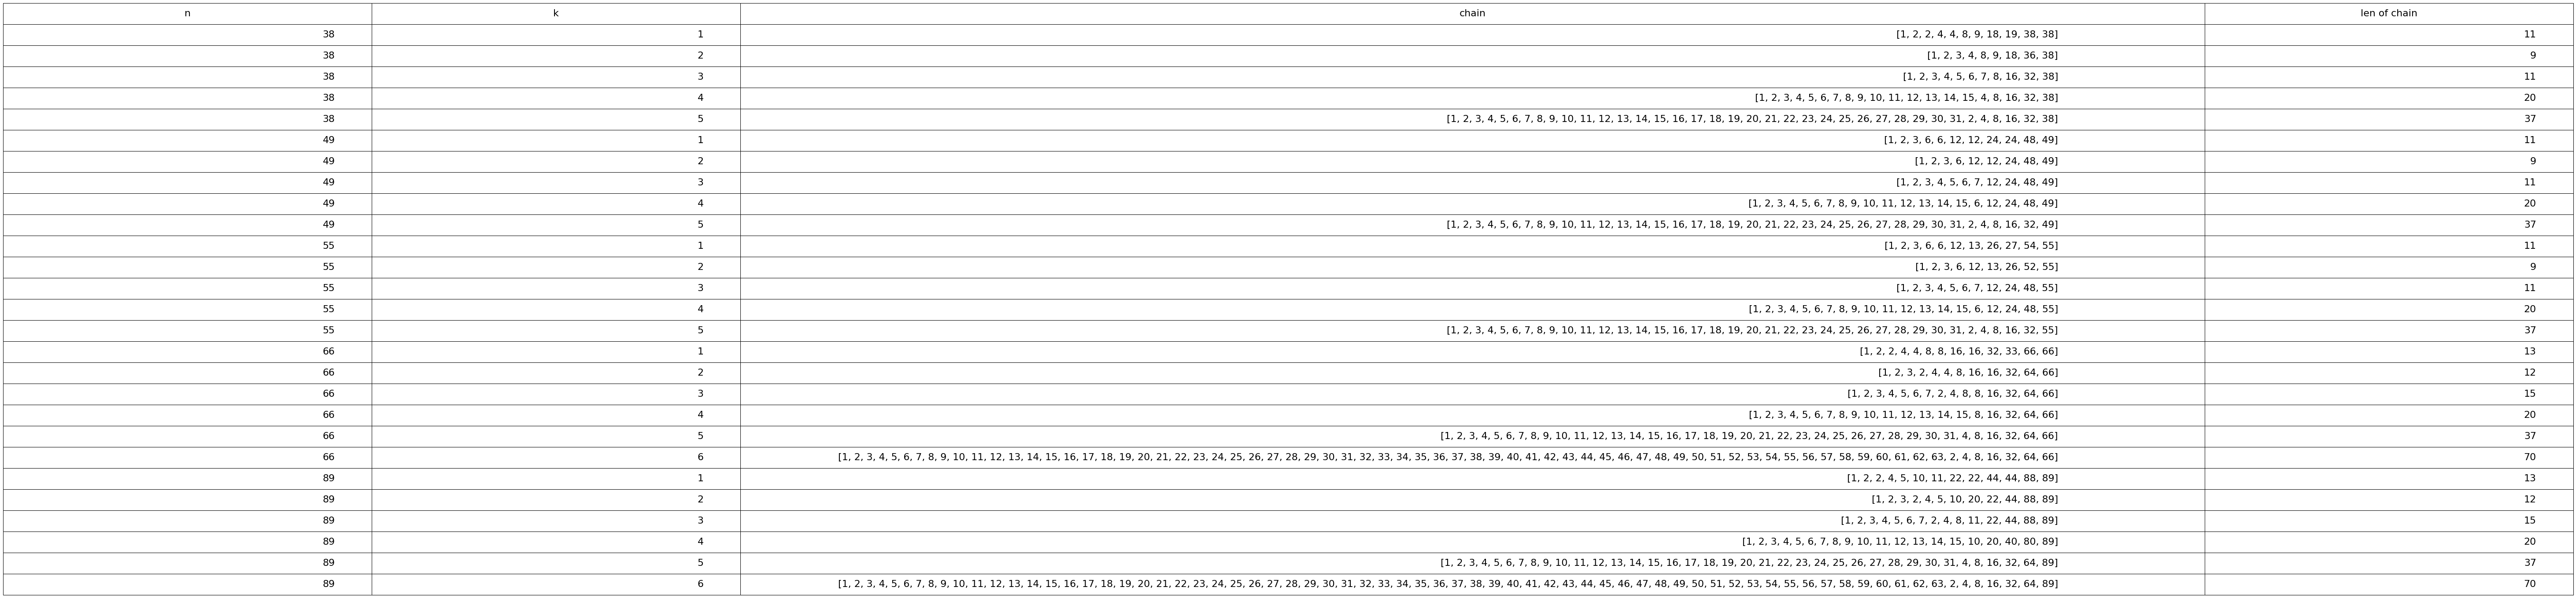

In [123]:
import matplotlib.pyplot as plot 
rows = []
nums = [38, 49, 55, 66, 89]
k = 1
for n in nums:
    while n >= 2 ** k:
        chain = Brouwer(n, k)
        rows.append([n, k, chain, len(chain)])
        k += 1
    k = 1

table = plot.table(cellText = rows, 
                  rowLoc = 'right', 
                  colLabels = ['n', 'k', 'chain', 'len of chain'],
                  loc = 'center')

table.set_fontsize(22)
table.scale(10, 4) 
table.auto_set_column_width([0,1,2,3])

plot.gca().get_xaxis().set_visible(False)
plot.gca().get_yaxis().set_visible(False)
plot.box(on=None)

print('Результаты алгоритма Брауэра:')


#### Вывод:

Из таблицы выше можно сделать вывод, что алгоритм Брауэра не даёт минимальную аддитивную цепочку. Наибольшее приближение к минимальной аддитивной цепочке происходит при $k = \lambda(\lambda(n))$. 
С увеличением $k$ длина цепочки становится больше, потому что число $2^k$ увеличивается вслед за $k$.

Можно заметить, что в аддитивных цепочках присутствуют повторяющиеся элементы. Это происходит, когда в цепочку добавляется $2q$, если $q < 2^{k-1}$, или $4q$, если $q < 2^{k-2}, ...$.

## Вывод по практической работе.
1. Были исследованы, проверены и реализованы алгоритм:

  Возвеждение в степень:
  
    - Бинарный метод возведения в степень
    - Метод множителей для возведения в степень
  Получение аддитивной цепочки для числа:
  
    - Алгоритм Брауэра для приближенного построения аддитивной цепочки и его модификация